In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [23]:
from sklearn.model_selection import train_test_split


In [7]:
df = pd.read_csv('train.csv')

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
df.drop('Id',axis=1,inplace=True)

In [14]:
cols = list(df.columns)

In [17]:
print(cols)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


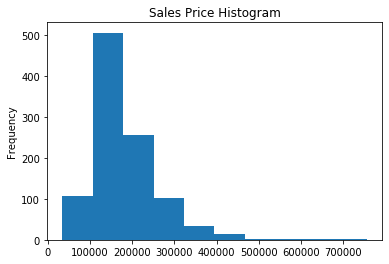

In [37]:
#Lets Plot sales price distribution
plt.title('Sales Price Histogram')
y_train.plot.hist()

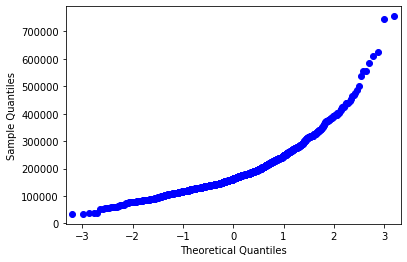

In [48]:
#lets check if the sales price follow normal distribution
import statsmodels.api as sm
sm.qqplot(df['SalePrice'])

plt.show()

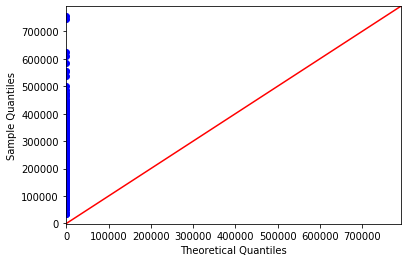

In [47]:
#lets check if the sales price follow normal distribution
import statsmodels.api as sm
sm.qqplot(df['SalePrice'],line='45')

plt.show()

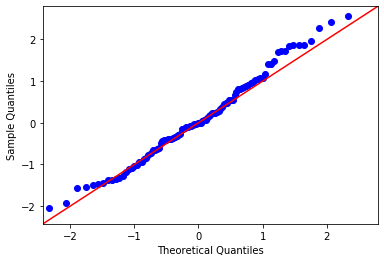

In [50]:
data_points = np.random.normal(0, 1, 100)     
  
sm.qqplot(data_points, line ='45') 
plt.show() 

In [55]:
var_quant = [f for f in X_train.columns if X_train.dtypes[f] != 'object']
var_qual = [f for f in X_train.columns if X_train.dtypes[f] == 'object']


In [56]:
print(var_quant)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [57]:
print(var_qual)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


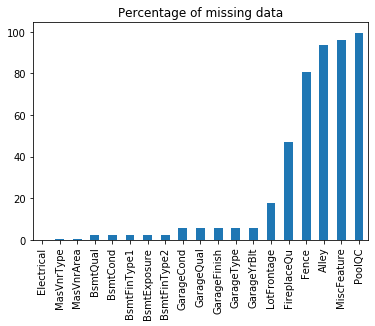

In [65]:
#lets check df_missing data
df_missing = df.isnull().sum()
df_missing = df_missing[df_missing > 0]
df_missing.sort_values(inplace=True)
df_missing = df_missing/df.shape[0]*100
plt.title('Percentage of missing data')
df_missing.plot.bar()

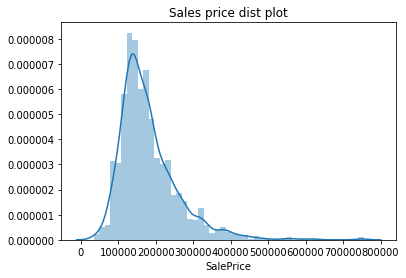

In [68]:
#Lets check distribution of Price and see if it is standard normal distribution
import seaborn as sns
plt.title('Sales price dist plot')
sns.distplot(df['SalePrice'])

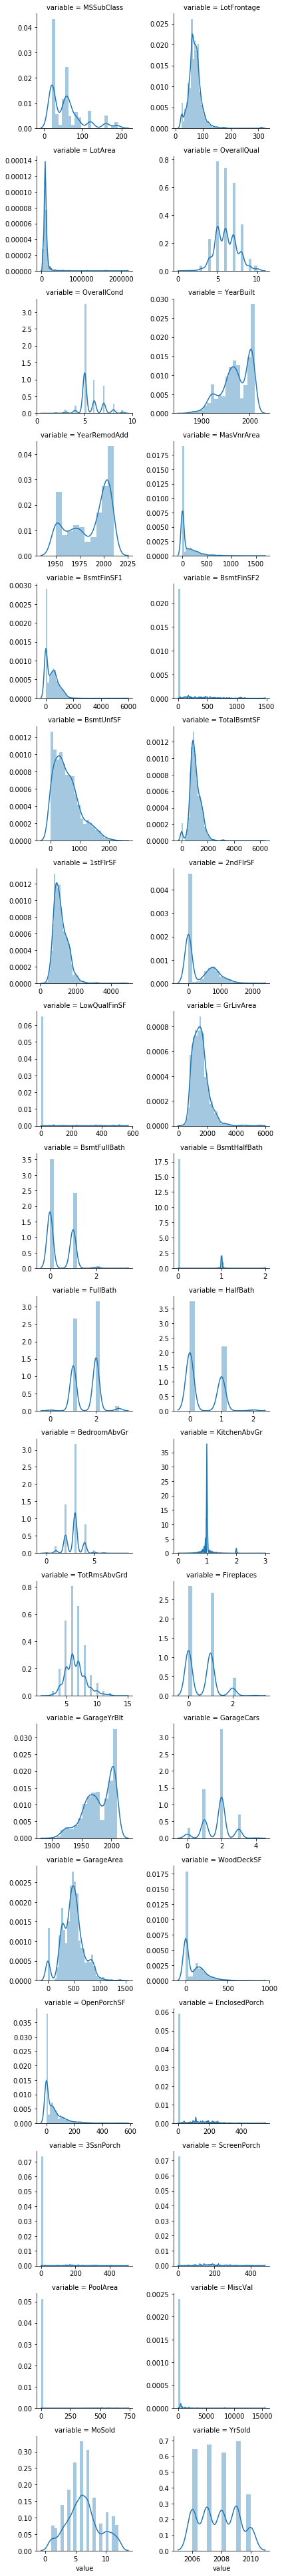

In [72]:
f = pd.melt(df, value_vars=var_quant)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


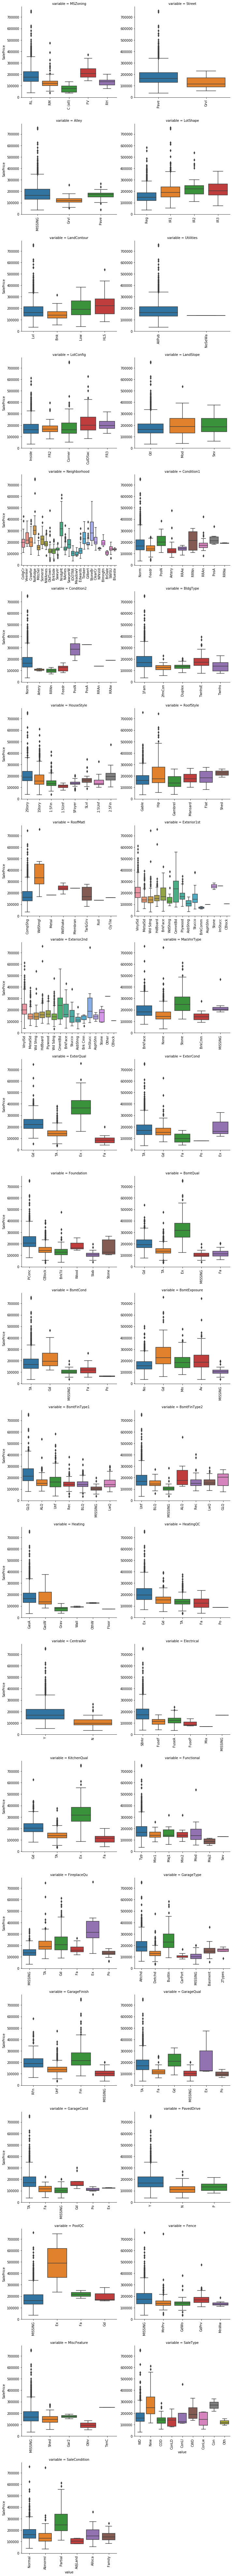

In [74]:
for c in var_qual:
    df[c] = df[c].astype('category')
    if df[c].isnull().any():
        df[c] = df[c].cat.add_categories(['MISSING'])
        df[c] = df[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df, id_vars=['SalePrice'], value_vars=var_qual)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

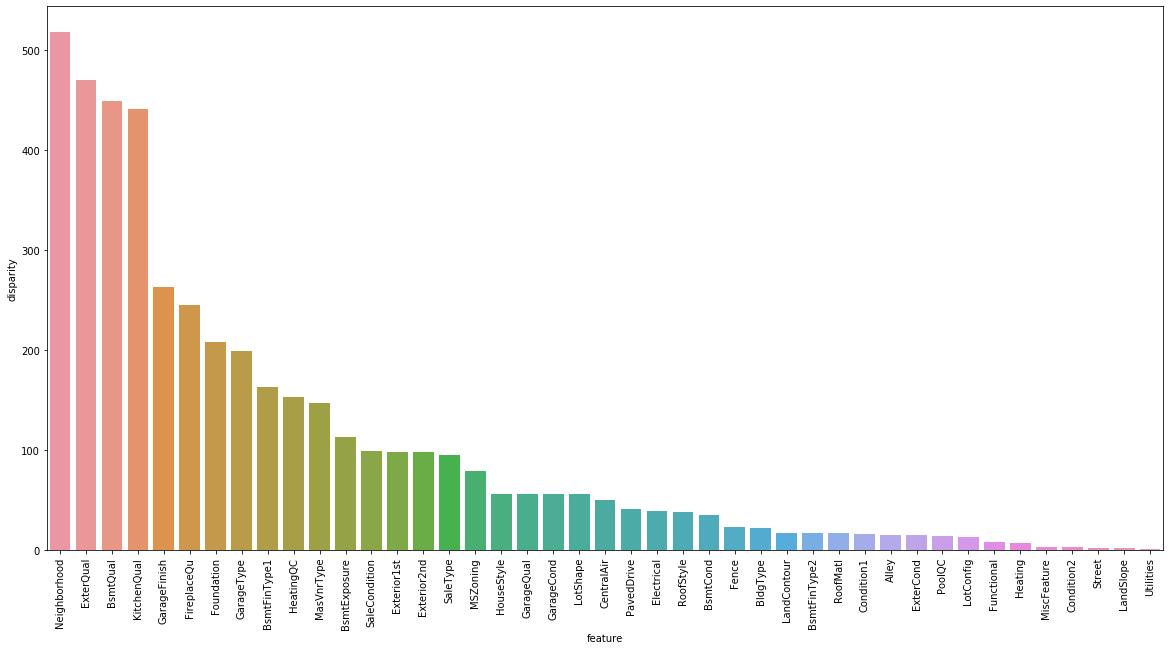

In [83]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = var_qual
    pvals = []
    for c in var_qual:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(df)
a['disparity'] = np.log(1./a['pval'].values)
plt.figure(figsize=(20,10))
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [84]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in var_qual:  
    encode(df, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


In [85]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageType_E,GarageFinish_E,GarageQual_E,GarageCond_E,PavedDrive_E,PoolQC_E,Fence_E,MiscFeature_E,SaleType_E,SaleCondition_E
0,60,RL,65.0,8450,Pave,MISSING,Reg,Lvl,AllPub,Inside,...,6.0,3.0,4.0,6.0,3.0,1.0,5.0,4.0,5.0,5.0
1,20,RL,80.0,9600,Pave,MISSING,Reg,Lvl,AllPub,FR2,...,6.0,3.0,4.0,6.0,3.0,1.0,5.0,4.0,5.0,5.0
2,60,RL,68.0,11250,Pave,MISSING,IR1,Lvl,AllPub,Inside,...,6.0,3.0,4.0,6.0,3.0,1.0,5.0,4.0,5.0,5.0
3,70,RL,60.0,9550,Pave,MISSING,IR1,Lvl,AllPub,Corner,...,3.0,2.0,4.0,6.0,3.0,1.0,5.0,4.0,5.0,2.0
4,60,RL,84.0,14260,Pave,MISSING,IR1,Lvl,AllPub,FR2,...,6.0,3.0,4.0,6.0,3.0,1.0,5.0,4.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,MISSING,Reg,Lvl,AllPub,Inside,...,6.0,3.0,4.0,6.0,3.0,1.0,5.0,4.0,5.0,5.0
1456,20,RL,85.0,13175,Pave,MISSING,Reg,Lvl,AllPub,Inside,...,6.0,2.0,4.0,6.0,3.0,1.0,3.0,4.0,5.0,5.0
1457,70,RL,66.0,9042,Pave,MISSING,Reg,Lvl,AllPub,Inside,...,6.0,3.0,4.0,6.0,3.0,1.0,4.0,2.0,5.0,5.0
1458,20,RL,68.0,9717,Pave,MISSING,Reg,Lvl,AllPub,Inside,...,6.0,2.0,4.0,6.0,3.0,1.0,5.0,4.0,5.0,5.0


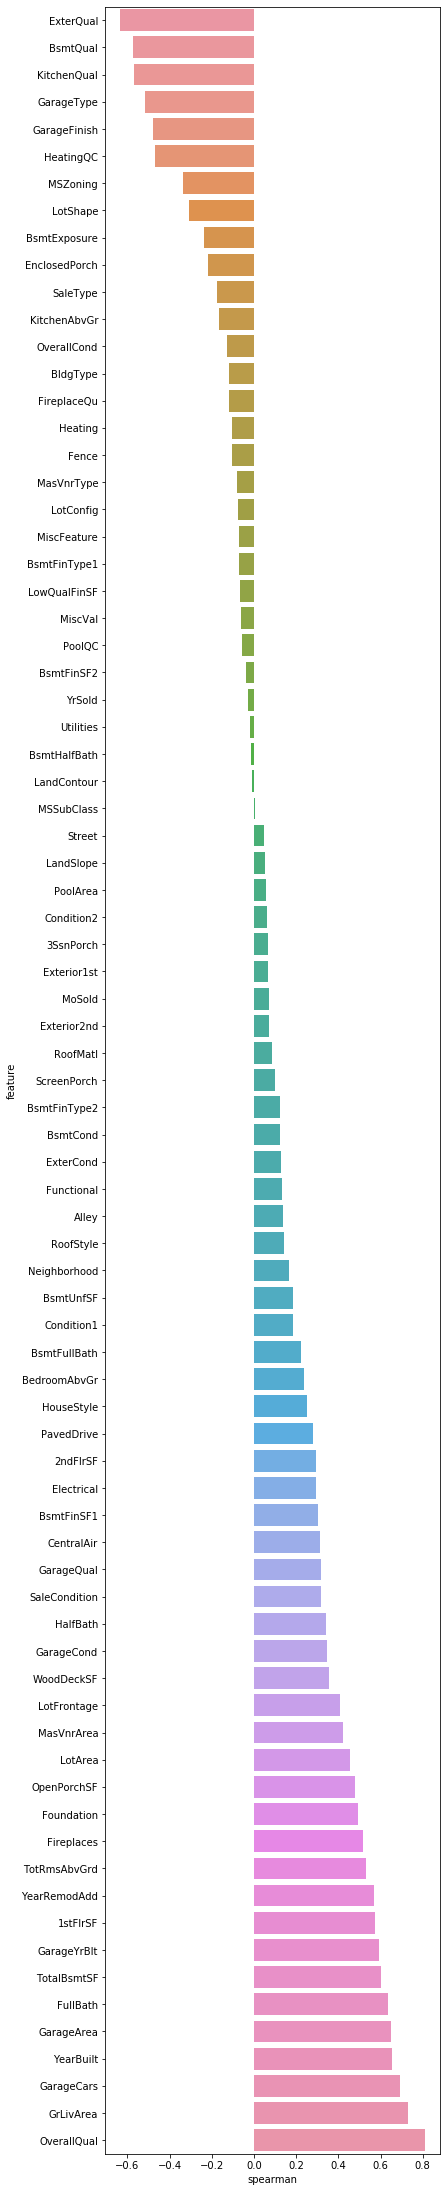

In [89]:
#after creating mean of house price based on categorical variables as a new feature lets check our correlations
def spearman_corr(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.50*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    return spr
    
features = var_qual + var_quant
spr = spearman_corr(df, features)

In [92]:
#lets check the values of spearman correlation , spearman correlation is also applicable when there is non linear relationship
spr.head()

,feature,spearman
18,ExterQual,-0.633315
21,BsmtQual,-0.571441
30,KitchenQual,-0.569857
33,GarageType,-0.517990
34,GarageFinish,-0.478904


Based on spearman correlation the following variables look very important for price 
OverallQual,GrLivArea,GarageCars,YearBuilt,GarageArea based on all the raw frames

## Lets check again spearman correlation including the new combination of categorical variable with the Price

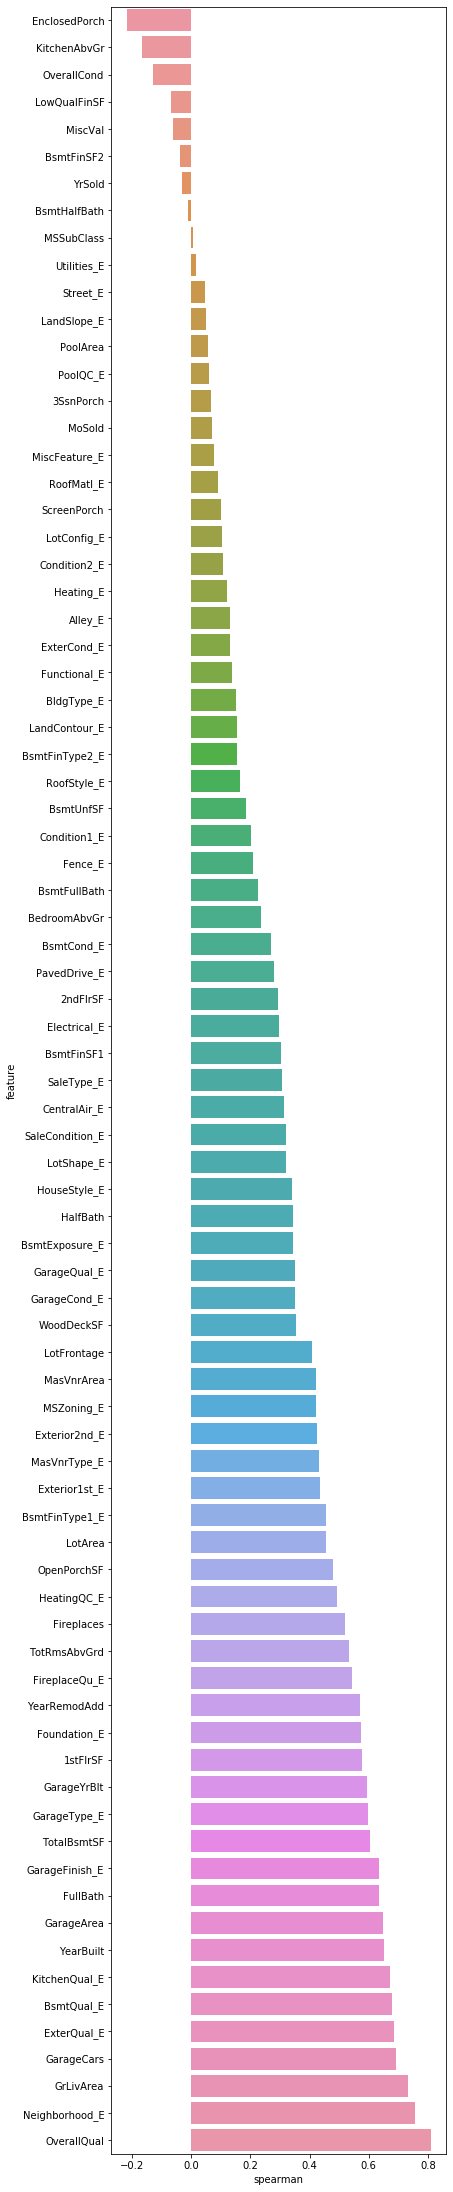

In [108]:
features = var_quant +   qual_encoded
spr = spearman_corr(df, features)

In [109]:
spr['spearman_abs'] = abs(spr['spearman'])

In [110]:
spr.sort_values(by='spearman_abs',ascending=False,inplace=True)

In [112]:
#lets take top 15 features based on spearman correlation
list(spr['feature'][:15])

['OverallQual',
 'Neighborhood_E',
 'GrLivArea',
 'GarageCars',
 'ExterQual_E',
 'BsmtQual_E',
 'KitchenQual_E',
 'YearBuilt',
 'GarageArea',
 'FullBath',
 'GarageFinish_E',
 'TotalBsmtSF',
 'GarageType_E',
 'GarageYrBlt',
 '1stFlrSF']

In [123]:
top_15_features = list(spr['feature'][:15])

In [124]:
#appending SalePrice 
top_15_features.append('SalePrice')

In [125]:
top_15_features

['OverallQual',
 'Neighborhood_E',
 'GrLivArea',
 'GarageCars',
 'ExterQual_E',
 'BsmtQual_E',
 'KitchenQual_E',
 'YearBuilt',
 'GarageArea',
 'FullBath',
 'GarageFinish_E',
 'TotalBsmtSF',
 'GarageType_E',
 'GarageYrBlt',
 '1stFlrSF',
 'SalePrice']

In [126]:
df_subset= df[top_15_features]

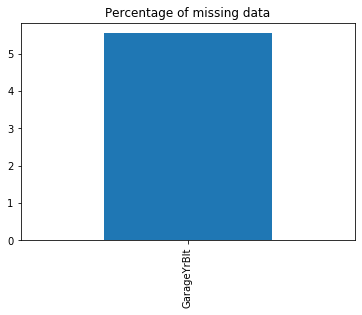

In [138]:
#lets check df_missing data
df_missing = df_subset.isnull().sum()
df_missing = df_missing[df_missing > 0]
df_missing.sort_values(inplace=True)
df_missing = df_missing/df.shape[0]*100
plt.title('Percentage of missing data')
df_missing.plot.bar()

In [139]:
#Since GarageYrBlt has 5% missing values lets remove them
df_subset.dropna(inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [140]:
from sklearn.model_selection import train_test_split
X=df_subset[top_15_features[0:-1]]
y=df_subset[top_15_features[-1]]

In [141]:
X.head()

,OverallQual,Neighborhood_E,GrLivArea,GarageCars,ExterQual_E,BsmtQual_E,KitchenQual_E,YearBuilt,GarageArea,FullBath,GarageFinish_E,TotalBsmtSF,GarageType_E,GarageYrBlt,1stFlrSF
0,7,17.0,1710,2,3.0,4.0,3.0,2003,548,2,3.0,856,6.0,2003.0,856
1,6,21.0,1262,2,2.0,4.0,2.0,1976,460,2,3.0,1262,6.0,1976.0,1262
2,7,17.0,1786,2,3.0,4.0,3.0,2001,608,2,3.0,920,6.0,2001.0,920
3,7,18.0,1717,3,2.0,3.0,3.0,1915,642,1,2.0,756,3.0,1998.0,961
4,8,25.0,2198,3,3.0,4.0,3.0,2000,836,2,3.0,1145,6.0,2000.0,1145


In [142]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [143]:
X.shape

(1379, 15)

In [144]:
y.shape

(1379,)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)  

In [146]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(965, 15)
(414, 15)
(965,)
(414,)


In [147]:
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                                max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, th

In [148]:
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

3

In [149]:
print(selected_feat)

Index(['OverallQual', 'Neighborhood_E', 'GrLivArea'], dtype='object')


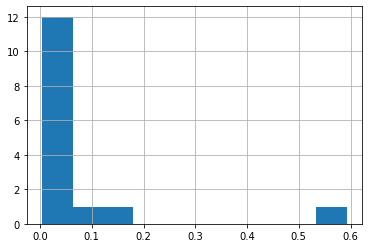

# So From Random Forest we get feature importance of the features and top 3 features are as follows 

- OverallQual
- Neighborhood_E
- GrLivArea

In [157]:
X=df_subset[['OverallQual', 'Neighborhood_E', 'GrLivArea']]
y=df_subset['SalePrice']

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)  

In [160]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(965, 3)
(965,)
(414, 3)
(414,)


In [178]:
#First Let us train a simple model and check the values
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

# The mean squared error
print('Root Mean squared error: %.2f'
      % sqrt(mean_squared_error(y_test, y_pred)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))



Coefficients: 
 [23463.99108805  3669.54270205    53.7429233 ]
Mean squared error: 1400495629.45
Root Mean squared error: 37423.20
Coefficient of determination: 0.77


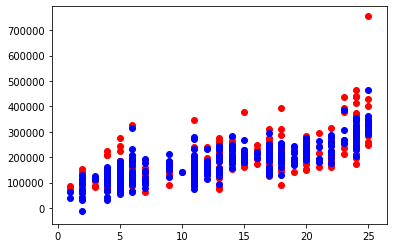

In [174]:
# Plot outputs
feat = 'Neighborhood_E' 
plt.scatter(X_test[feat], y_test,  color='red')
plt.scatter(X_test[feat], y_pred, color='blue')

plt.show()

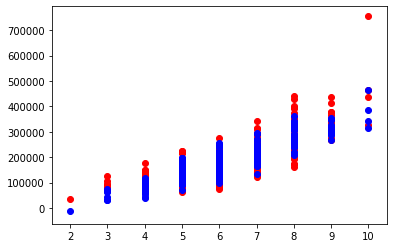

In [175]:
# Plot outputs
feat = 'OverallQual' 
plt.scatter(X_test[feat], y_test,  color='red')
plt.scatter(X_test[feat], y_pred, color='blue')

plt.show()

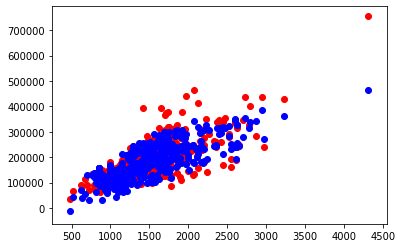

In [176]:
# Plot outputs
feat = 'GrLivArea' 
plt.scatter(X_test[feat], y_test,  color='red')
plt.scatter(X_test[feat], y_pred, color='blue')

plt.show()

In [161]:
print(y_test.shape)
print(X_test.shape)
print(y_pred.shape)

(414,)
(414, 3)
(414,)


In [ ]:
#Lets train a model using the above 
class_weight = [{0: 1.3, 1: 1}, {0: 1.4, 1: 1}, {0: 1.5, 1: 1}]

params = {
    'C': [0.1, 1],
    'class_weight': class_weight,
    'intercept_scaling': [0.05, 0.1, 0.5]
    }

clf = LogisticRegression()

grid_cv = GridSearchCV(estimator=clf, param_grid=params, cv=3, scoring='recall',
                       verbose=10, n_jobs=-1)
grid_cv.fit(x_train, y_train)

best_score = grid_cv.best_score_
best_estimator = grid_cv.best_estimator_

print('Best score: {}'.format(best_score))
print('Best estimator: {}'.format(best_estimator))
print('Coeff:\n', best_estimator.coef_)
print('Intercept:', best_estimator.intercept_)




In [181]:
from datetime import datetime
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error , make_scorer
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression


In [182]:
features = var_quant +   qual_encoded


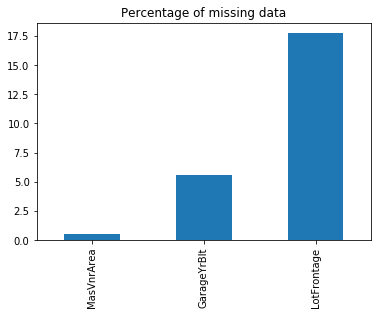

In [188]:
#lets check df_missing data
df_missing = df.isnull().sum()
df_missing = df_missing[df_missing > 0]
df_missing.sort_values(inplace=True)
df_missing = df_missing/df.shape[0]*100
plt.title('Percentage of missing data')
df_missing.plot.bar()

In [189]:
#Lets drop all the missing rows
df_drop_na =  df.dropna()

In [192]:
df_drop_na.shape

(1121, 123)

In [193]:
X = df_drop_na[features]
y = df_drop_na['SalePrice']

In [194]:
# Indicate number of folds for cross validation
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

# Parameters for models
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]

In [ ]:
# Lasso Model
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas = alphas2, random_state = 42, cv=kfolds))

# Printing Lasso Score with Cross-Validation
lasso_score = cross_val_score(lasso, X, y, cv=kfolds, scoring='neg_mean_squared_error')
lasso_rmse = np.sqrt(-lasso_score.mean())
print("LASSO RMSE: ", lasso_rmse)
print("LASSO STD: ", lasso_score.std())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238294196838.86926, tolerance: 492515175.92964023
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234283748361.03918, tolerance: 492515175.92964023
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233795782560.26312, tolerance: 481249771.70839536
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You mi